In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [89]:
#sample Data
#[movie_length, genre_code](assuming genre is coded as: 0 for Action, 1 for Romance, etc.)
movie_features = np.array([[120, 0],[150, 1],[90, 0],[140, 1],[100, 0],[80, 1],[110, 0],[130, 1]])
movie_likes = np.array([1,1,0,1,0,1,0,1]) #1: Like, 0: Dislike

In [90]:
#Creating a Naive Bayes Model
model = GaussianNB()

In [91]:
#Training the Model
model.fit(movie_features, movie_likes)

GaussianNB()

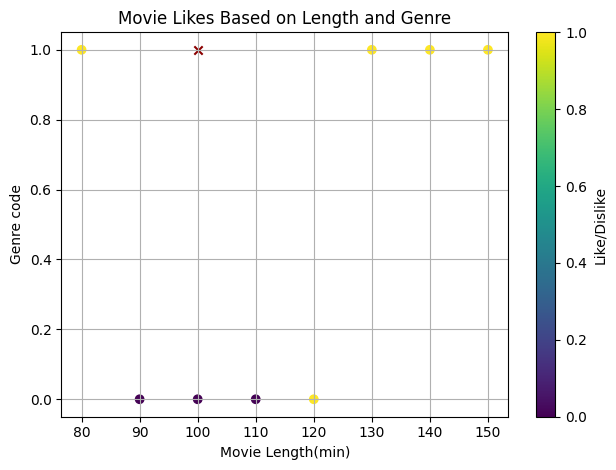

In [92]:
#Prediction
new_movie = np.array([[100, 1]]) # [movie_length, genre_code]
predicted_like = model.predict(new_movie)
output_folder = r"E:\Machine Learning\Models\Gaussian Naive Bayes\output" # add your own
#plotting
plt.scatter(movie_features[:, 0], movie_features[:,1], c=movie_likes, cmap='viridis',marker='o')
plt.scatter(new_movie[:,0],new_movie[:,1],color='darkred',marker='x')
plt.title('Movie Likes Based on Length and Genre')
plt.xlabel('Movie Length(min)')
plt.ylabel('Genre code')
plt.colorbar(label='Like/Dislike')
plt.tight_layout()
plt.grid(True)
plt.savefig(f"{output_folder}/MovieLength vs Genre General.jpg",format='jpg', dpi=300, bbox_inches='tight')
plt.show()

In [93]:
#computing accuracy
# Predictions on the training data (for simplicity, you can test on your own data)
y_pred = model.predict(movie_features)

# Calculate accuracy
accuracy = accuracy_score(movie_likes, y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(movie_likes, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(movie_likes, y_pred)
recall = recall_score(movie_likes, y_pred)
f1 = f1_score(movie_likes, y_pred)

# Display the results
print(f"Accuracy: {accuracy*100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"F1 Score: {f1*100:.2f}%")

# Displaying the prediction based on the model's output
like_or_dislike = 'Like' if predicted_like[0] == 1 else 'Not Like'
print(f"Jenny will {like_or_dislike} a movie of {new_movie[0, 0]} minutes long in the {['Action', 'Romance'][new_movie[0, 1]]} genre.")

Accuracy: 87.50%
Confusion Matrix:
[[3 0]
 [1 4]]
Precision: 100.00%
Recall: 80.00%
F1 Score: 88.89%
Jenny will Like a movie of 100 minutes long in the Romance genre.
